# Optimizers

In this sheet we will look at three different optimizers and their behavior.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2

def df(x):
    return 2*x

def g(x):
    return 1/3*x**3

def dg(x):
    return x**2

In [3]:
def vanilla_gd(x_start, learning_rate, epochs, d = df):
    x = [x_start]
    for _ in range(epochs):
        grad = d(x[-1])
        # The adjustment of the parameter is the same for all parameters
        x.append(x[-1] - learning_rate * grad)
    return x

def adagrad(x_start, learning_rate, epochs, d = df):
    x = [x_start]
    grad_squared_sum = 0
    for _ in range(epochs):
        grad = d(x[-1])
        # The adjustment of the parameter depends on the size of the gradient
        # If the gradient is large, the adjustment is small
        # In a sense, each parameter has its own learning rate
        grad_squared_sum += grad**2
        x.append(x[-1] - learning_rate / (np.sqrt(grad_squared_sum) + 1e-7) * grad)
    return x

def rmsprop(x_start, learning_rate, decay_rate, epochs, d = df):
    x = [x_start]
    grad_squared_sum = 0
    for _ in range(epochs):
        grad = d(x[-1])
        # The adjustment of the parameter depends on the size of the gradient
        # The decay rate is used to control the influence of the past gradients
        # The bigger the decay rate, the less the past gradients influence the adjustment
        grad_squared_sum = decay_rate * grad_squared_sum + (1 - decay_rate) * grad**2
        x.append(x[-1] - learning_rate / (np.sqrt(grad_squared_sum) + 1e-7) * grad)
    return x

In [4]:
x_start = 5
learning_rate = 0.1
epochs = 100

x_vanilla = vanilla_gd(x_start, learning_rate, epochs)
x_adagrad = adagrad(x_start, learning_rate, epochs)
x_rmsprop = rmsprop(x_start, learning_rate, 0.9, epochs)

print(f"Vanilla gradient descent: start at {x_start}, end at {x_vanilla[-1]}, f(x) = {f(x_vanilla[-1])}")
print(f"Adagrad: start at {x_start}, end at {x_adagrad[-1]}, f(x) = {f(x_adagrad[-1])}")
print(f"RMSprop: start at {x_start}, end at {x_rmsprop[-1]}, f(x) = {f(x_rmsprop[-1])}")

Vanilla gradient descent: start at 5, end at 1.0185179881672439e-09, f(x) = 1.0373788922202499e-18
Adagrad: start at 5, end at 3.2832073868807914, f(x) = 10.779450745268594
RMSprop: start at 5, end at 2.3721946507571964e-16, f(x) = 5.627307461081057e-32


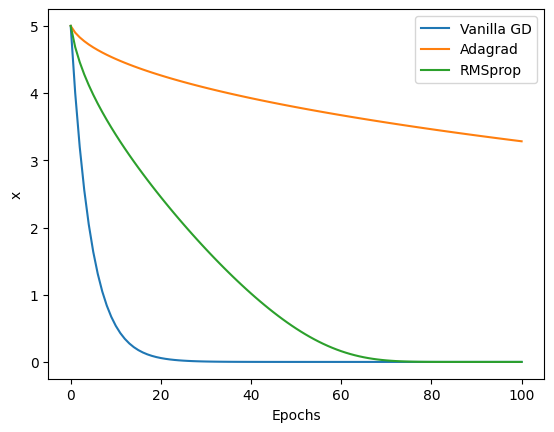

In [5]:
plt.plot(x_vanilla, label="Vanilla GD")
plt.plot(x_adagrad, label="Adagrad")
plt.plot(x_rmsprop, label="RMSprop")
plt.xlabel("Epochs")
plt.ylabel("x")
plt.legend()

Text(0, 0.5, 'x')

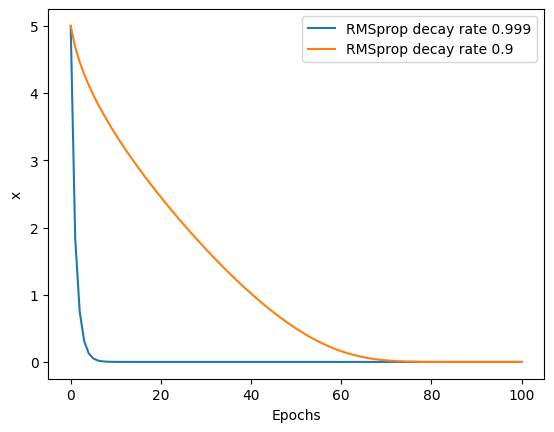

In [6]:
for i in [0.999, 0.9]:
    _ = rmsprop(x_start, learning_rate, i, epochs)
    plt.plot(_, label=f"RMSprop decay rate {i}")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("x")

## Vanilla Gradient descent

$$
\theta_{t+1, i} = \theta_{t, i} - \eta g_{t, i}
$$

* $\theta_{t+1, i}$ represents the updated value of the parameter $\theta_i$ at time step $t+1$.
* $\theta_{t, i}$ represents the current value of the parameter $\theta_i$ at time step $t$.
* $\eta$ is the learning rate.
* $g_{t, i}$ represents the gradient of the loss function with respect to the parameter $\theta_i$ at time step $t$.

Exploding gradients: [-88284.98181155683, -2338359689.021888, -1.6403778129111217e+18, -8.072518107273224e+35, -1.954966457767622e+71]


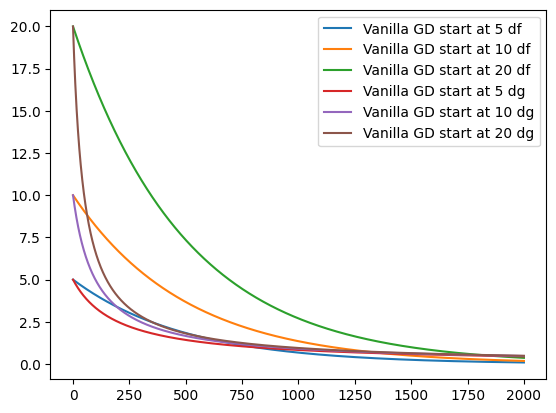

In [7]:
epochs = 2000
for d in [df, dg]:
    for s in [5, 10, 20]:
        _ = vanilla_gd(s, 1e-3, epochs, d)
        plt.plot(_, label=f"Vanilla GD start at {s} {d.__name__}")
plt.legend()

print('Exploding gradients:', vanilla_gd(5, 0.3, 10, dg)[-5:])

Notice, that we have reduced the learning rate for the plots. If we would keep the learning rate, the learning rates would become so big, that they become out of bounds. This is called the **exploding gradients** problem. Vice versa, it is also possible to receive **vanishing gradients** which do not contribute anymore.

## Adagrad

$$
\theta_{t+1, i} = \theta_{t, i} - \frac{\eta}{\sqrt{G_{t, ii} + \epsilon}}g_{t, i}
$$

* $\theta_{t+1, i}$ represents the updated value of the parameter $\theta_i$ at time step $t+1$.
* $\theta_{t, i}$ represents the current value of the parameter $\theta_i$ at time step $t$.
* $\eta$ is the learning rate.
* $G_{t, ii}$ represents the cumulative sum of squared gradients for the parameter $\theta_i$ up to time step $t$.
* $g_{t, i}$ represents the gradient of the loss function with respect to the parameter $\theta_i$ at time step $t$.
* $\epsilon$ is a small constant (usually added for numerical stability).

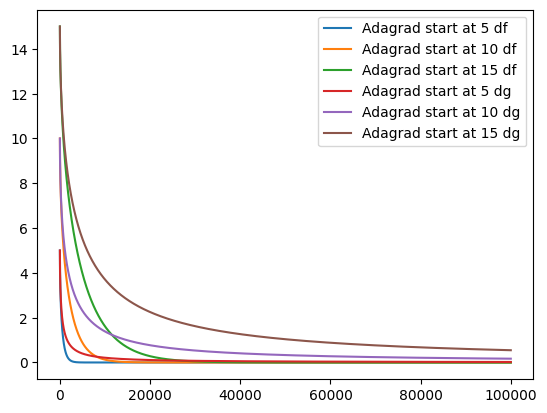

In [8]:
epochs = 100000
for d in [df, dg]:
    for s in [5, 10, 15]:
        _ = adagrad(s, learning_rate, epochs, d)
        plt.plot(_, label=f"Adagrad start at {s} {d.__name__}")
plt.legend()

Adagrad has been developed to adjust the learning rate parameter during training automatically. We can maintain our normal learning rate, as it is adjusted automatically. Unfortunately, is is not guaranteed, that Adagrad converges. Then the accumulated gradient becomes too big, the effective learning rate is reduced to 0. This can be seen in the the graph above for the **dg** function.

## RMSProp

$$ \theta_{t+1, i} = \theta_{t, i} - \frac{\eta}{\sqrt{E[g^2]t + \epsilon}} g_{t, i} $$

* $\theta_{t+1, i}$ represents the updated value of the parameter $\theta_i$ at time step $t+1$.
* $\theta_{t, i}$ represents the current value of the parameter $\theta_i$ at time step $t$.
* $\eta$ is the learning rate.
* $E[g^2]_t$ represents the moving average of squared gradients for the parameter $\theta_i$ up to time step $t$.
* $g_{t, i}$ represents the gradient of the loss function with respect to the parameter $\theta_i$ at time step $t$.
* $\epsilon$ is a small constant (usually added for numerical stability).

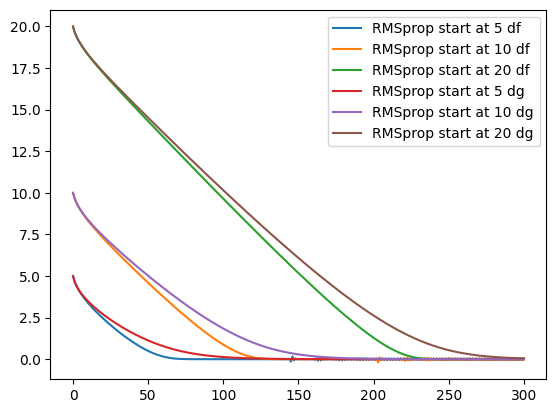

In [9]:
epochs = 300
for d in [df, dg]:
    for s in [5, 10, 20]:
        _ = rmsprop(s, learning_rate, 0.9, epochs, d)
        plt.plot(_, label=f"RMSprop start at {s} {d.__name__}")
plt.legend()

RMSProp is developed based on Adagrad. The gradients converge correctly. Past gradients are taken into account as with adagrad, but their influence is reduced over time.

## Adam

Adam is the best of both worlds, it combines Adagrad and RMSProp.

* Like RMSProp, Adam maintains a moving average of squared gradients.
* Like AdaGrad, it adapts the learning rate for each parameter.
* Additionally, Adam incorporates momentum by keeping track of the moving average of gradients and the squared gradients.

$$
\theta_{t+1, i} = \theta_{t, i} - \frac{\eta}{\sqrt{v_{\text{hat}}} + \epsilon} \cdot m_{\text{hat}}
$$

* $\theta_{t+1, i}$ represents the updated value of the parameter $\theta_i$ at time step $t+1$.
* $\theta_{t, i}$ represents the current value of the parameter $\theta_i$ at time step $t$.
* $\eta$ is the learning rate.
* $v_{\text{hat}}$ represents the moving average of squared gradients for the parameter $\theta_i$ up to time step $t$.
* $m_{\text{hat}}$ represents the bias-corrected moving average of gradients for the parameter $\theta_i$ up to time step $t$.
* $\epsilon$ is a small constant (usually added for numerical stability).


In [18]:
# beta: The exponential decay rate for the first  and second moment estimates.
def adam(x_start, learning_rate, beta1, beta2, epochs, d = df):
    x = [x_start]
    m = 0
    v = 0
    for i in range(epochs):
        grad = d(x[-1])
        # Moving window concept, as above
        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * grad**2
        m_hat = m / (1 - beta1**(i+1))
        v_hat = v / (1 - beta2**(i+1))
        x.append(x[-1] - learning_rate / (np.sqrt(v_hat) + 1e-7) * m_hat)
    return x

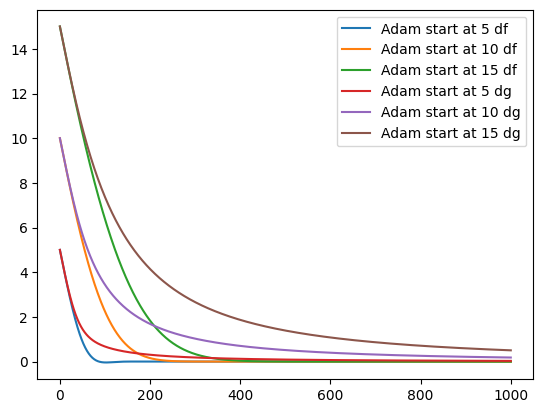

In [17]:
epochs = 1000
for d in [df, dg]:
    for s in [5, 10, 15]:
        _ = adam(s, learning_rate, 0.9, 0.999, epochs, d)
        plt.plot(_, label=f"Adam start at {s} {d.__name__}")
plt.legend()

## Summary of Optimizers

In this notebook, we explored four different optimization algorithms: vanilla gradient descent, Adagrad, RMSProp, and Adam. Here are the key insights for each optimizer:

### Vanilla Gradient Descent
* Vanilla gradient descent is a basic optimization algorithm that updates the parameters in the opposite direction of the gradient.
* It uses a fixed learning rate for all parameters.
* It can suffer from the problem of exploding or vanishing gradients if the learning rate is not properly chosen.

### Adagrad
* Adagrad is an adaptive optimization algorithm that adjusts the learning rate for each parameter based on the historical gradients.
* It accumulates the squared gradients and uses them to scale the learning rate.
* It performs well on sparse datasets where some parameters are updated infrequently.
* However, it may have difficulty converging if the accumulated gradients become too large.

### RMSProp
* RMSProp is an adaptive optimization algorithm that addresses the convergence issues of Adagrad.
* It uses a moving average of squared gradients to adjust the learning rate for each parameter.
* The decay rate controls the influence of past gradients on the adjustment.
* It performs well in practice and is widely used in deep learning.

### Adam
* Adam combines the best features of RMSProp and momentum-based optimization.
* It maintains both a moving average of gradients and a moving average of squared gradients.
* It adapts the learning rate for each parameter based on these moving averages.
* Adam is known for its good performance and fast convergence in many deep learning tasks.